## Feature engineering. 
This is the notebook for feature engineering. We start by looking at how the data looks now.

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [27]:
# Define paths
processed_data_dir = Path('../data/processed')

# List all processed files
processed_files = list(processed_data_dir.glob('*_processed.csv'))
print(f"Found {len(processed_files)} processed data files:")
for file in processed_files:
    print(f"  - {file.name}")

# Load all data into a dictionary
data_dict = {}
for file_path in processed_files:
    data_type = file_path.stem.replace('_processed', '')
    print(f"\nLoading {data_type}...")
    
    try:
        df = pd.read_csv(file_path)
        # Convert datetime column
        df['datetime'] = pd.to_datetime(df['datetime'])
        data_dict[data_type] = df
        print(f"  ✓ Loaded {len(df)} records")
        print(f"  ✓ Date range: {df['datetime'].min()} to {df['datetime'].max()}")
        print(f"  ✓ Columns: {list(df.columns)}")
    except Exception as e:
        print(f"  ✗ Error loading {data_type}: {e}")

print(f"\nSuccessfully loaded {len(data_dict)} datasets")

Found 4 processed data files:
  - water_height_processed.csv
  - flow_rate_processed.csv
  - wind_direction_processed.csv
  - current_direction_processed.csv

Loading water_height...
  ✓ Loaded 26892 records
  ✓ Date range: 2025-01-01 00:00:00 to 2025-07-02 10:30:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y']

Loading flow_rate...
  ✓ Loaded 26264 records
  ✓ Date range: 2025-01-01 00:00:00 to 2025-07-02 10:30:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y']

Loading wind_direction...
  ✓ Loaded 26171 records
  ✓ Date range: 2025-01-01 00:00:00 to 2025-07-02 10:30:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y']

Loading current_direction...
  ✓ Loaded 26175 records
  ✓ Date range: 2025-01-01 00:00:00 to 2025-07-02 10:30:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y']

Successfully loaded 4 datasets


In [28]:
# Display overview of each dataset
for data_type, df in data_dict.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {data_type.upper()}")
    print(f"{'='*60}")
    
    print(f"Shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nBasic statistics for NUMERIEKEWAARDE:")
    print(df['NUMERIEKEWAARDE'].describe())
    
    print(f"\nMissing values:")
    print(df.isnull().sum())


DATASET: WATER_HEIGHT
Shape: (26892, 5)

First few rows:
             datetime  datetime_unix  NUMERIEKEWAARDE         X         Y
0 2025-01-01 00:00:00       1.554192        -0.993398  0.999999  0.999999
1 2025-01-01 00:10:00       1.554198        -1.011171  0.999999  0.999999
2 2025-01-01 00:20:00       1.554204        -1.011171  0.999999  0.999999
3 2025-01-01 00:30:00       1.554211        -1.011171  0.999999  0.999999
4 2025-01-01 00:40:00       1.554217        -0.993398  0.999999  0.999999

Data types:
datetime           datetime64[ns]
datetime_unix             float64
NUMERIEKEWAARDE           float64
X                         float64
Y                         float64
dtype: object

Basic statistics for NUMERIEKEWAARDE:
count    26892.000000
mean        -0.092081
std          0.994913
min         -1.775431
25%         -0.975624
50%         -0.229138
75%          0.748404
max          2.188056
Name: NUMERIEKEWAARDE, dtype: float64

Missing values:
datetime           0
datetime_u

In [29]:
# Analyze each dataset
for data_type, df in data_dict.items():
    print(f"\n{'='*50}")
    print(f"DATA QUALITY: {data_type.upper()}")
    print(f"{'='*50}")
    
    # Temporal coverage
    print(f"Temporal Coverage:")
    print(f"  Start: {df['datetime'].min()}")
    print(f"  End: {df['datetime'].max()}")
    print(f"  Duration: {df['datetime'].max() - df['datetime'].min()}")
    
    # Check for gaps in time series
    df_sorted = df.sort_values('datetime')
    time_diff = df_sorted['datetime'].diff()
    print(f"  Average time interval: {time_diff.mean()}")
    print(f"  Max time gap: {time_diff.max()}")
    
    # Value distribution
    print(f"\nValue Distribution:")
    print(f"  Min: {df['NUMERIEKEWAARDE'].min():.2f}")
    print(f"  Max: {df['NUMERIEKEWAARDE'].max():.2f}")
    print(f"  Mean: {df['NUMERIEKEWAARDE'].mean():.2f}")
    print(f"  Std: {df['NUMERIEKEWAARDE'].std():.2f}")
    
    # Check for outliers
    mean_val = df['NUMERIEKEWAARDE'].mean()
    std_val = df['NUMERIEKEWAARDE'].std()
    outliers = df[(df['NUMERIEKEWAARDE'] < mean_val - 3*std_val) | 
                   (df['NUMERIEKEWAARDE'] > mean_val + 3*std_val)]
    print(f"  Outliers (>3σ): {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    # Check for duplicate timestamps
    duplicates = df.duplicated(subset=['datetime']).sum()
    print(f"  Duplicate timestamps: {duplicates}")


DATA QUALITY: WATER_HEIGHT
Temporal Coverage:
  Start: 2025-01-01 00:00:00
  End: 2025-07-02 10:30:00
  Duration: 182 days 10:30:00
  Average time interval: 0 days 00:09:46.166375367
  Max time gap: 0 days 00:10:00

Value Distribution:
  Min: -1.78
  Max: 2.19
  Mean: -0.09
  Std: 0.99
  Outliers (>3σ): 0 (0.0%)
  Duplicate timestamps: 0

DATA QUALITY: FLOW_RATE
Temporal Coverage:
  Start: 2025-01-01 00:00:00
  End: 2025-07-02 10:30:00
  Duration: 182 days 10:30:00
  Average time interval: 0 days 00:10:00.182766629
  Max time gap: 0 days 00:30:00

Value Distribution:
  Min: -3.26
  Max: 4.02
  Mean: 0.00
  Std: 1.00
  Outliers (>3σ): 133 (0.5%)
  Duplicate timestamps: 0

DATA QUALITY: WIND_DIRECTION
Temporal Coverage:
  Start: 2025-01-01 00:00:00
  End: 2025-07-02 10:30:00
  Duration: 182 days 10:30:00
  Average time interval: 0 days 00:10:02.315628582
  Max time gap: 0 days 04:40:00

Value Distribution:
  Min: -1.67
  Max: 1.80
  Mean: 0.00
  Std: 1.00
  Outliers (>3σ): 0 (0.0%)
  Du

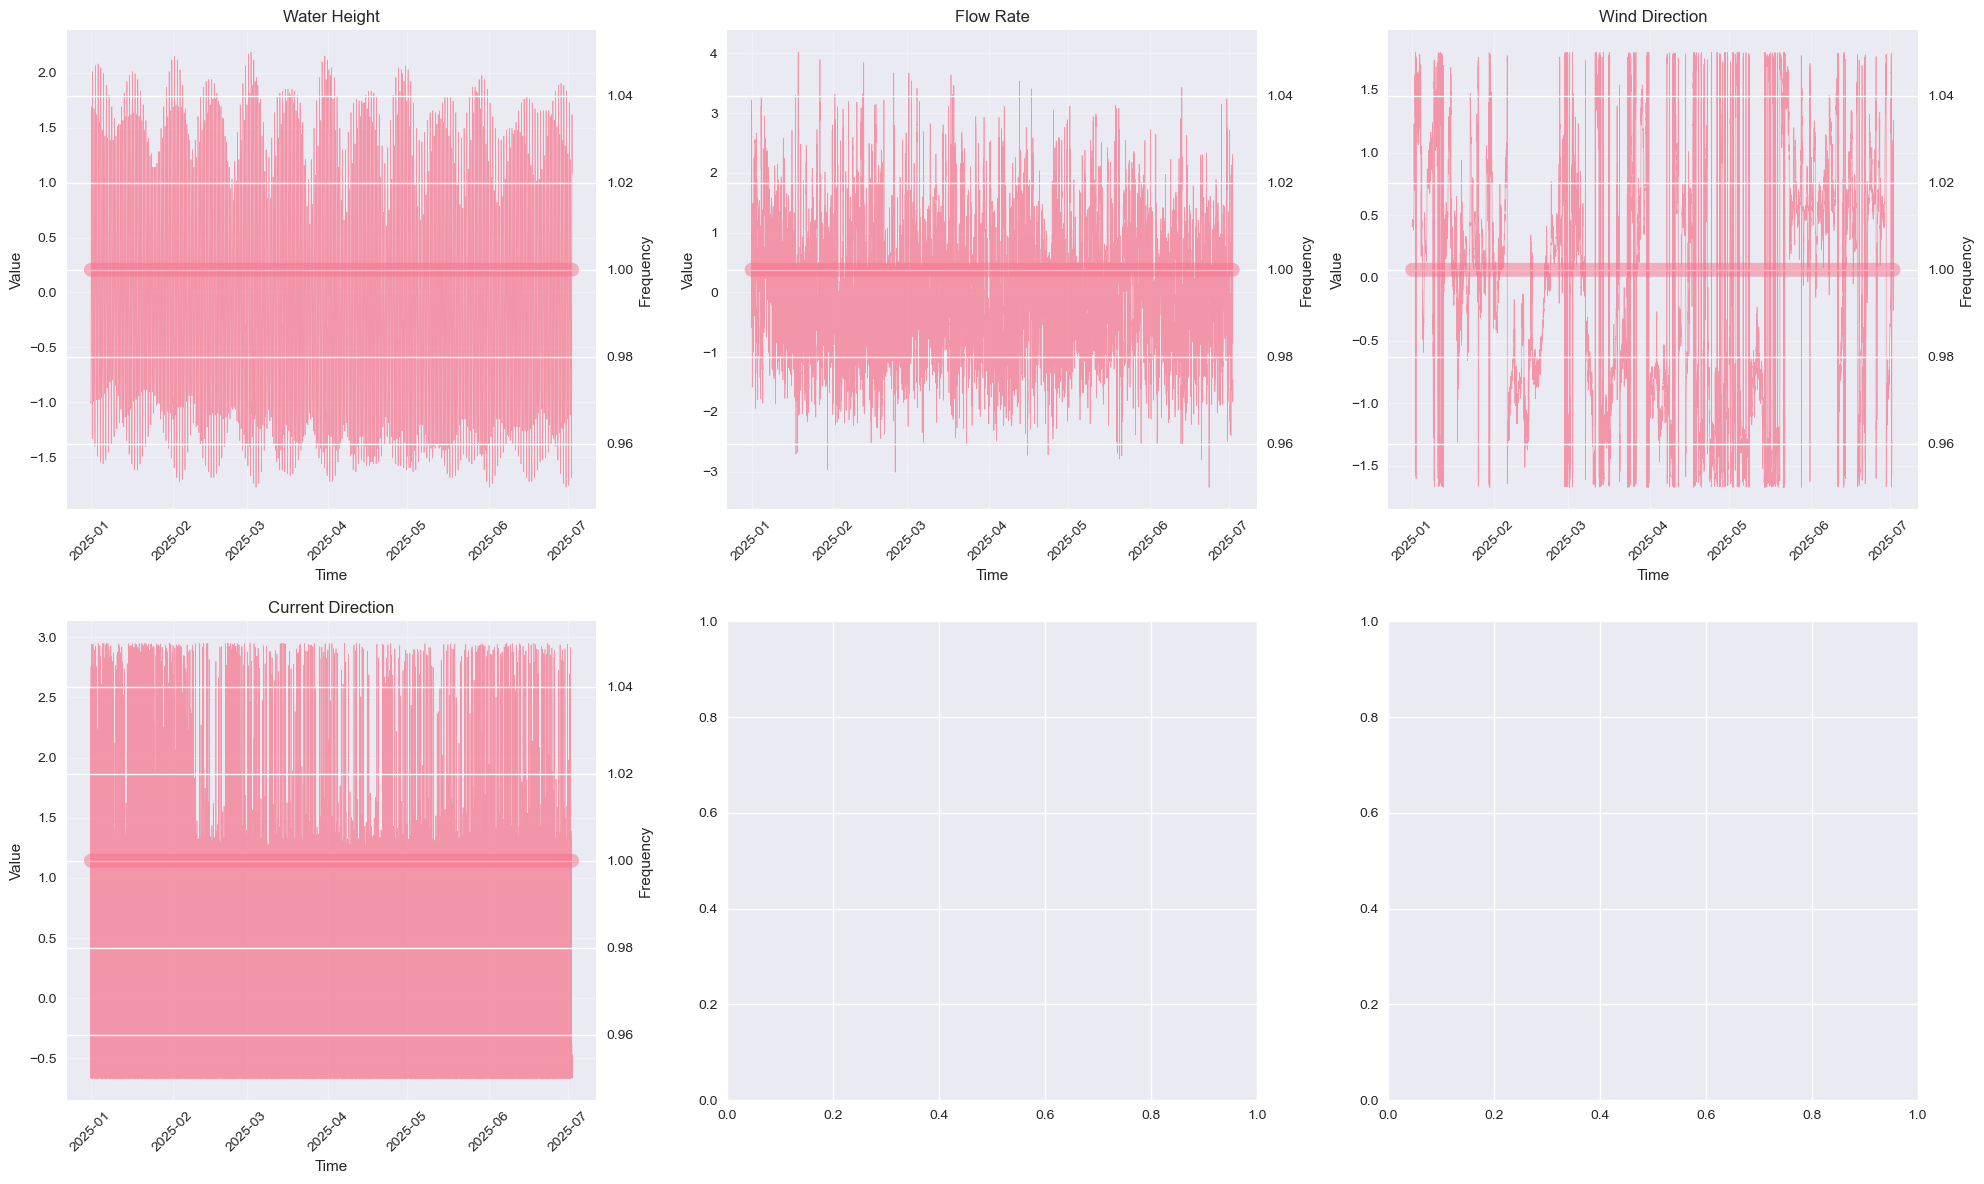

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (data_type, df) in enumerate(data_dict.items()):
    if idx >= len(axes):
        break
    ax = axes[idx]
    
    # --- Plot 1: numeric value over time ---
    ax.plot(df['datetime'], df['NUMERIEKEWAARDE'],
            alpha=0.7,      
            linewidth=0.5)  
    ax.set_title(data_type.replace("_", " ").title())
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    # --- Compute timestamp frequency ---
    counts = df['datetime'].value_counts().sort_index()
    ax2 = ax.twinx()
    ax2.plot(counts.index, counts.values,
             alpha=0.5,      
             linewidth=10)    
    ax2.set_ylabel('Frequency')
    ax2.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

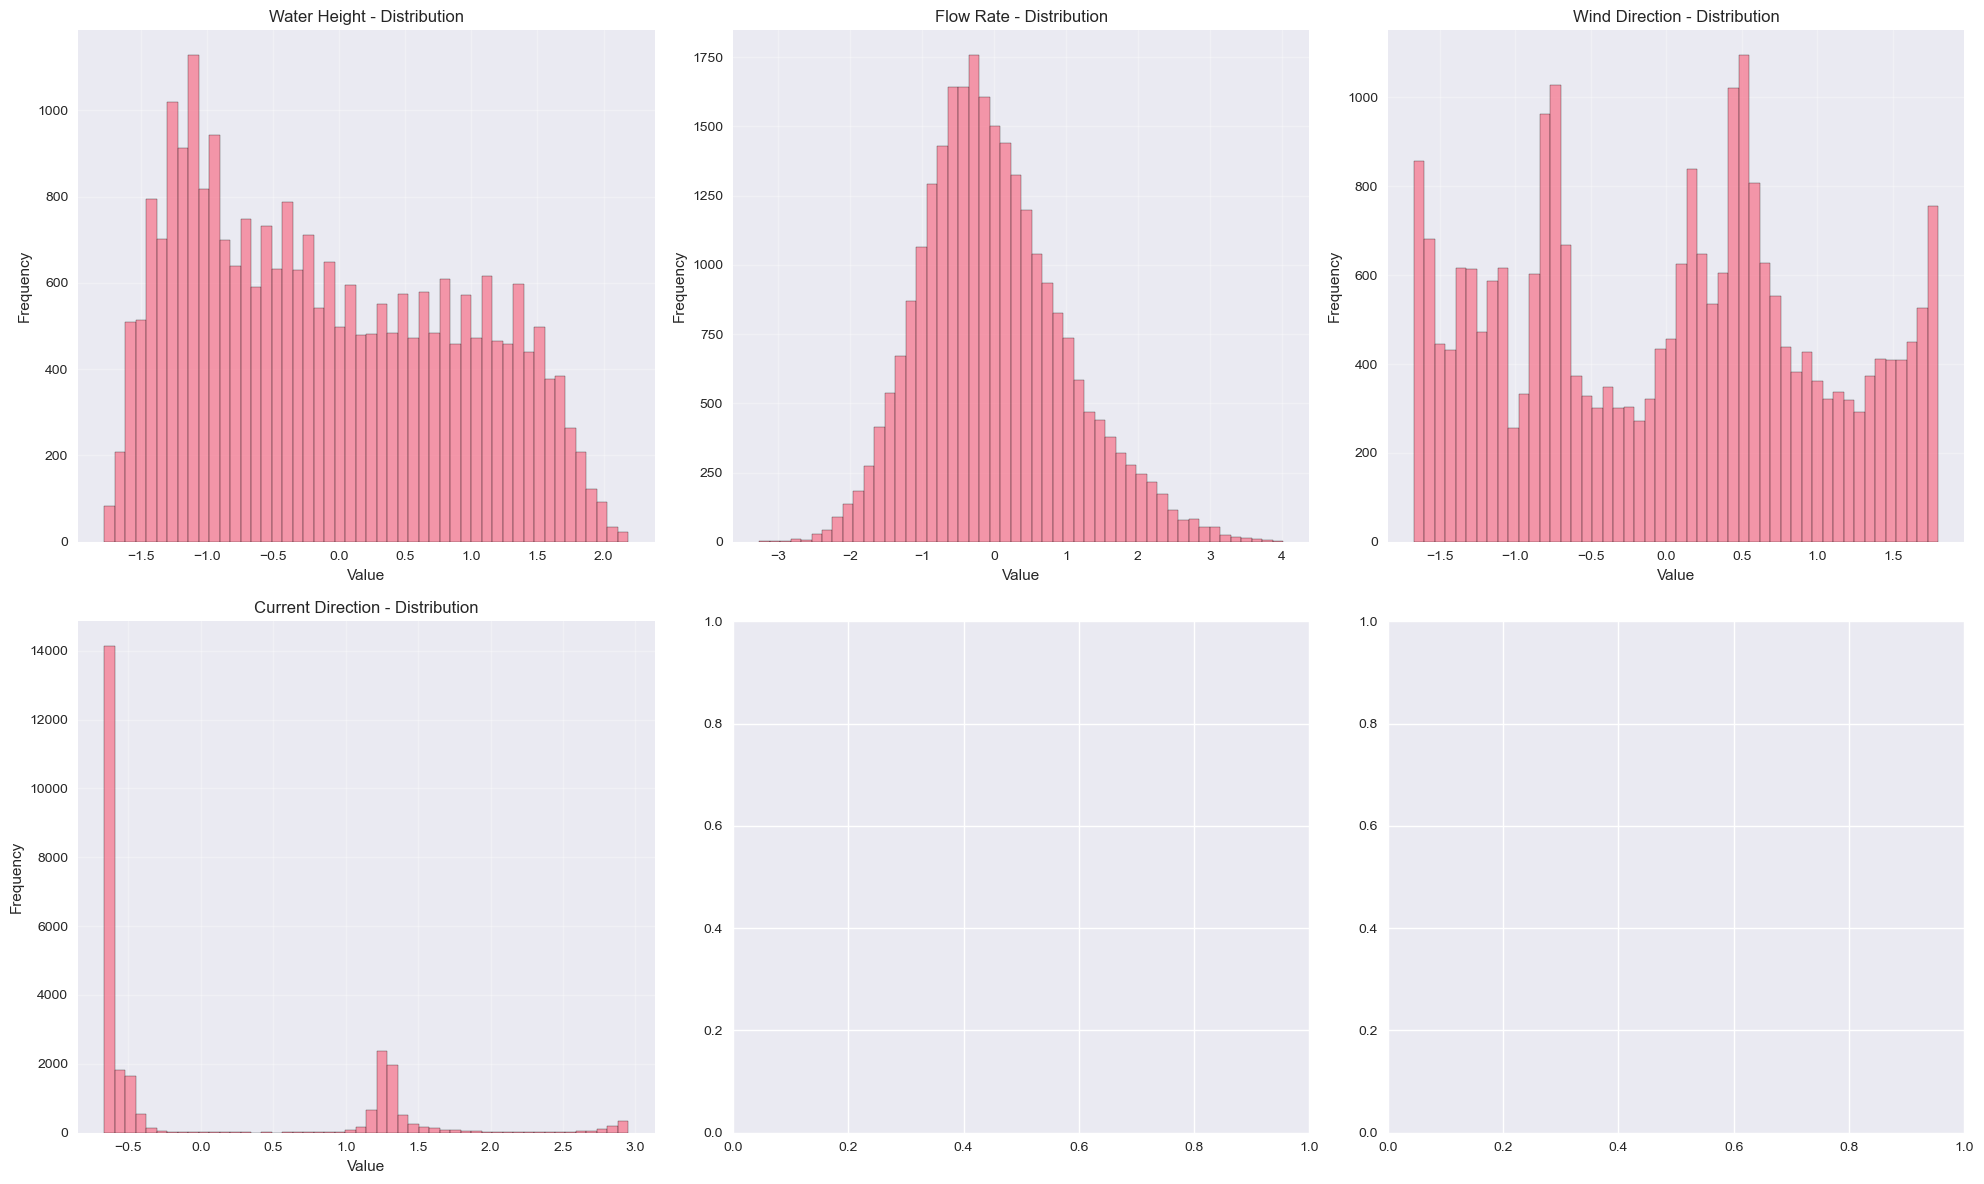

In [31]:
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (data_type, df) in enumerate(data_dict.items()):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    # Histogram
    ax.hist(df['NUMERIEKEWAARDE'], bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f'{data_type.replace("_", " ").title()} - Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()